# Word Embeding

In [1]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110324 sha256=56db8e5b9f35e608fa7ffc0d5ef6159383770cebec930521f80bfaad0dd728ef
  Stored in directory: c:\users\rajshree\appdata\local\pip\cache\wheels\56\b5\6d\86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
  Created wheel for boto3: filename=boto3-1.14.48-py2.py3-none-any.whl size=127855 sha256=8d58b82a01aa234983bad3dd8c52fed727e4f0d6ecf891d08cae7bb153a40b6c
  Stored in directory: c:\users\rajshree\appdata\local\pip\cache\wheels\b0\f8\d9\d2a816eb3b5fed353cf3e7746d2c3bd0cac694045d063a2b53
Successfully built smart-open boto3


In [2]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import random 
import pprint

In [14]:
myfile = open(r"Assignment 7.txt",encoding='utf-8')
document = myfile.read()

In [15]:
#Converting data to lower text
document_lower = document.lower()

In [16]:
#Replacing numbers with space
pattern = '[0-9]'
text = re.sub(pattern,'', document_lower)

In [17]:
#replacing multiple white spaces with single white space

text = re.sub('\s+',' ',text)

In [18]:
clean_text = text.replace('\n', '')

In [33]:
#Now we will remove all punctuation from sting
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
file_cleaned = text.translate(str.maketrans('','',punctuations))

In [20]:
file_cleaned

'the us president donald trump and house of representative democrats should end their deadlock and reach a compromise on the second economic relief package for a battered us economy argues an editorial in the washington post. “the country has already waited too long. a wide consensus among economists and business leaders recognizes that the u.s. government not only can afford to extend additional largescale aid but cannot afford not to” notes the editorial. “yet republicans and democrats are far apart on how much money to provide. the republican senate put forth a . trillion proposal after the democratic house offered a . trillion plan.” “democrats insist on far more in aid to state and local governments than republicans are willing to accept. democrats also want to continue a  supplemental unemployment benefit that republicans would renew only at a lower amount. republicans are also resisting additional funds to help states carry out the november election safely” it adds.'

In [23]:
#Now lets convert out string to token
sentences = sent_tokenize(file_cleaned)

In [24]:
#Now converting into word token
tokenize_word = [word_tokenize(sentence) for sentence in sentences]

In [25]:
#Now lets remove stopwords from out data
for i in range(len(tokenize_word)):
    tokenize_word[i] = [word for word in tokenize_word[i] if word not in stopwords.words()]

In [26]:
# Training the Word2Vec model
model = Word2Vec(tokenize_word, min_count=1)

words = model.wv.vocab

In [27]:
#Here we are displaying 5 most similar words for 20 random tokens
pp = pprint.PrettyPrinter(indent=4)

for i in range(21):
    key, val = random.choice(list(words.items())) 
    similar_words = model.wv.most_similar(key,topn=5)
    print("Top 5 similar words for token = ",key)
    print("")
    pp.pprint(similar_words)
    print("----------------------------------------------------")

Top 5 similar words for token =  house

[   ('senate', 0.18457069993019104),
    ('would', 0.15783445537090302),
    ('.', 0.13231360912322998),
    ('u.s.', 0.12241894006729126),
    ('wide', 0.12122169137001038)]
----------------------------------------------------
Top 5 similar words for token =  trump

[   ('democrats', 0.27876946330070496),
    ('washington', 0.2587333917617798),
    ('relief', 0.22904717922210693),
    ('afford', 0.22788161039352417),
    ('apart', 0.20042356848716736)]
----------------------------------------------------
Top 5 similar words for token =  consensus

[   ('second', 0.22623395919799805),
    ('local', 0.20043569803237915),
    ('economists', 0.1787157952785492),
    ('washington', 0.1610291302204132),
    ('economy', 0.15524549782276154)]
----------------------------------------------------
Top 5 similar words for token =  unemployment

[   ('plan.', 0.23601557314395905),
    ('post', 0.19739234447479248),
    ('provide', 0.16596946120262146),
    (

#Now lets Plot 2D graph to see words similarity of at least 20 words



In [28]:
#Getting random 20 words from dictionary

vocab = []

for i in range(21):
    key, val = random.choice(list(words.items())) 
    vocab.append(key)

In [29]:
vocab

['economic',
 'yet',
 'put',
 'plan.',
 'economy',
 '”',
 'already',
 'offered',
 'republican',
 'reach',
 'trump',
 'trillion',
 'business',
 'local',
 'willing',
 'proposal',
 'waited',
 'state',
 'trump',
 'apart',
 'among']

C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


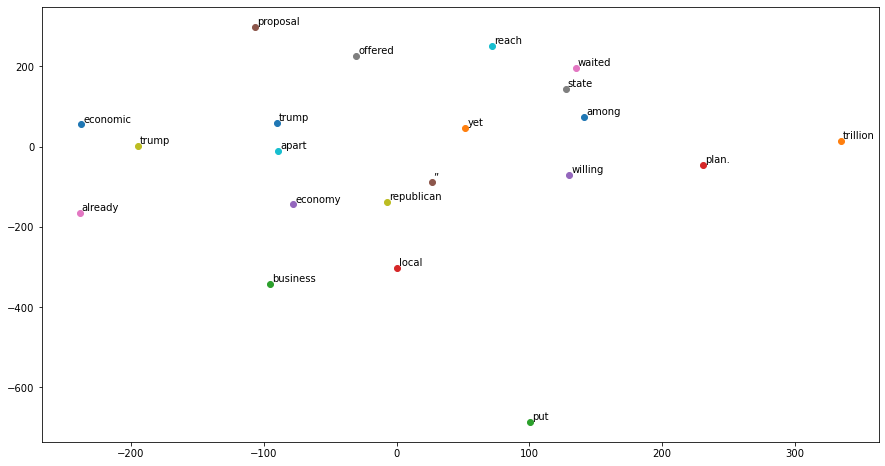

In [30]:
#Now lets plot 2D graph
from sklearn.manifold import  TSNE
def tsne_plot(model,vocab):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model,vocab)

Here we can see similarity of words with each other, economy is near to republican, state is very waited to family and among.

Conclusion- we load a document from a text of ptrint.in news, after loading data performed some data cleaning and preprocessing techniques, removed double spaces, special symbols and stopwords from text data. Then trained a model on Word2Vec and created a vocab